In [1]:
import seml
import pandas as pd
from run_seml import run
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 120)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
seml_results = seml.get_results('rgnn_rpprgo_cora_citeseer', to_data_frame=True)

In [4]:
len(seml_results)

3600

In [5]:
relevant_columns = ['_id', 
       'config.model_params.label',
       'config.model_params.model',
       'config.dataset', 
       'config.model_params.mean',
       'result.accuracy',
       'config.model_params.hidden_size',
       'config.model_params.nlayers',
       # 'config.model_params.n_filters',
       # 'config.model_params.gdc_params', 
       # 'config.model_params.svd_params',
       # 'config.model_params.jaccard_params',
       'config.model_params.dropout', 
       'config.model_params.alpha',
       'config.model_params.eps',
       'config.model_params.topk', 
       'config.model_params.mean_kwargs.temperature',
       'config.model_params.mean_kwargs.k',
       #'config.model_params.mean_kwargs.with_weight_correction',
       #'config.model_params.do_cache_adj_prep', 
       #'config.model_params.ppr_normalization',
       #'config.train_params.lr',
       #'config.train_params.weight_decay', 'config.train_params.patience',
       #'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       #'config.train_params.batch_size', 'config.binary_attr', 'config.seed',
       #'config.artifact_dir', 'config.model_storage_type', 'config.device',
       #'config.display_steps', 'config.data_device', 'config.data_dir',
       # 'result.trace_val', 'result.trace_train',
       #'result.model_path'
       ]
seml_results.columns

Index(['_id', 'config.overwrite', 'config.db_collection', 'config.dataset',
       'config.model_params.label', 'config.model_params.model',
       'config.model_params.dropout', 'config.model_params.n_filters',
       'config.model_params.gdc_params', 'config.model_params.svd_params',
       'config.model_params.jaccard_params',
       'config.model_params.do_cache_adj_prep', 'config.model_params.alpha',
       'config.model_params.eps', 'config.model_params.hidden_size',
       'config.model_params.mean', 'config.model_params.mean_kwargs.k',
       'config.model_params.mean_kwargs.temperature',
       'config.model_params.mean_kwargs.with_weight_correction',
       'config.model_params.nlayers', 'config.model_params.ppr_normalization',
       'config.model_params.topk', 'config.train_params.lr',
       'config.train_params.weight_decay', 'config.train_params.patience',
       'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       'config.train_params.batch_siz

In [6]:
seml_results[relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.model_params.mean,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.model_params.mean_kwargs.k
0,1,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.594071,64,3,0.50,0.25,0.01,64,0.2,64.0
1,2,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.627668,64,3,0.25,0.25,0.01,64,1.0,64.0
2,3,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.640316,32,2,0.50,0.25,0.01,64,0.2,64.0
3,4,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.586957,64,4,0.25,0.50,0.01,64,0.2,64.0
4,5,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.594862,64,4,0.25,0.50,0.01,64,0.2,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,3596,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.555615,32,2,0.25,0.25,0.01,64,1.0,NaN
3596,3597,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.584492,128,2,0.25,0.25,0.01,64,0.5,NaN
3597,3598,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.580749,160,2,0.50,0.10,0.01,64,1.0,NaN
3598,3599,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.556684,128,2,0.25,0.10,0.01,64,0.5,NaN


In [33]:
groups = [
"config.dataset",
#'config.model_params.label',
#"config.binary_attr",
#"config.normalize",
#"config.model_params.ppr_normalization",
#"config.model_params.hidden_size",
#"config.model_params.nlayers",
#"config.model_params.alpha",
# "config.model_params.dropout",
#"config.model_params.mean"
]
seml_results = seml_results[seml_results["config.binary_attr"]==False]
seml_results = seml_results[seml_results["config.normalize"]==False]
seml_results.groupby(groups).mean()[['result.accuracy']]

result.accuracy
config.dataset config.model_params.label                 
citeseer       Jaccard GCN                       0.721034
               RGCN                              0.651693
               SVD GCN                           0.636542
               Vanilla GCN                       0.715865
               Vanilla GDC                       0.707130
cora_ml        Jaccard GCN                       0.810408
               RGCN                              0.815679
               SVD GCN                           0.777075
               Vanilla GCN                       0.823847
               Vanilla GDC                       0.831225

In [52]:
#sum(list(seml_results["config.dataset"] == "citeseer")  and list(seml_results["config.model_params.mean"] == "soft_k_medoid"))

1200

In [7]:
cora_results = seml_results[list(seml_results["config.dataset"] == "cora_ml")]
cora_median_results = cora_results[cora_results["config.model_params.mean"] == "soft_median"]
cora_mediod_results = cora_results[cora_results["config.model_params.mean"] == "soft_k_medoid"]

citeseer_results = seml_results[list(seml_results["config.dataset"] == "citeseer")]
citeseer_median_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_median"]
citeseer_mediod_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_k_medoid"]

len(cora_median_results),len(cora_mediod_results),len(citeseer_median_results),len(citeseer_mediod_results)                    

(900, 900, 900, 900)

In [40]:
metric = "result.accuracy"
best_results = cora_results[cora_results[metric] == cora_results[metric].max()]

best_results = pd.concat([
    best_results,
    citeseer_results[citeseer_results[metric] == citeseer_results[metric].max()]])
    
best_results[relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.model_params.mean,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.model_params.mean_kwargs.k
2648,2649,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.793281,64,2,0.50,0.1,0.01,64,5.0,64.0
3458,3459,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.745989,64,2,0.25,0.1,0.01,64,5.0,NaN


In [8]:
metric = "result.accuracy"
best_results = cora_median_results[cora_median_results[metric] == cora_median_results[metric].max()]

best_results = pd.concat([
    best_results,
    cora_mediod_results[cora_mediod_results[metric] == cora_mediod_results[metric].max()]])
    
best_results = pd.concat([
    best_results,
    citeseer_median_results[citeseer_median_results[metric] == citeseer_median_results[metric].max()]])

best_results = pd.concat([
    best_results,
    citeseer_mediod_results[citeseer_mediod_results[metric] == citeseer_mediod_results[metric].max()]])

best_results[relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.model_params.mean,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.model_params.mean_kwargs.k
3276,3277,Soft Median PPRGo,RobustPPRGo,cora_ml,soft_median,0.787747,64,2,0.10,0.1,0.01,64,5.0,NaN
2648,2649,Soft Medoid PPRGo,RobustPPRGo,cora_ml,soft_k_medoid,0.793281,64,2,0.50,0.1,0.01,64,5.0,64.0
3458,3459,Soft Median PPRGo,RobustPPRGo,citeseer,soft_median,0.745989,64,2,0.25,0.1,0.01,64,5.0,NaN
2820,2821,Soft Medoid PPRGo,RobustPPRGo,citeseer,soft_k_medoid,0.745455,64,2,0.10,0.1,0.01,64,5.0,64.0
2878,2879,Soft Medoid PPRGo,RobustPPRGo,citeseer,soft_k_medoid,0.745455,64,2,0.10,0.1,0.01,64,5.0,64.0


In [104]:
print(best_results[relevant_columns].to_markdown())

|      |   _id | config.model_params.model   | config.dataset   |   result.accuracy |   config.model_params.hidden_size |   config.model_params.nlayers |   config.model_params.dropout |   config.model_params.alpha |   config.model_params.eps |   config.model_params.topk | config.model_params.ppr_normalization   |
|-----:|------:|:----------------------------|:-----------------|------------------:|----------------------------------:|------------------------------:|------------------------------:|----------------------------:|--------------------------:|---------------------------:|:----------------------------------------|
| 1791 |  1792 | PPRGo                       | cora_ml          |          0.805534 |                                64 |                             2 |                           0.1 |                         0.1 |                      0.01 |                         64 | row                                     |
| 1903 |  1904 | PPRGo                       | citeseer

In [11]:
def epoch_mean(trace, epoch_num):
    epoch_mean = list()
    batches_per_epoch = int(len(trace) / epoch_num)
    for i in range(epoch_num):
        epoch_mean.append(sum(trace[i * batches_per_epoch:(i+1) * batches_per_epoch]) / batches_per_epoch)
    return epoch_mean

In [12]:
id = 2648
exp = seml_results.iloc[id]

epoch_num = exp["config.train_params.max_epochs"]
val_loss = epoch_mean(exp["result.trace_val.loss"], epoch_num)
val_acc = epoch_mean(exp["result.trace_val.acc"], epoch_num)
train_loss = epoch_mean(exp["result.trace_train.loss"], epoch_num)
train_acc = epoch_mean(exp["result.trace_train.acc"], epoch_num)

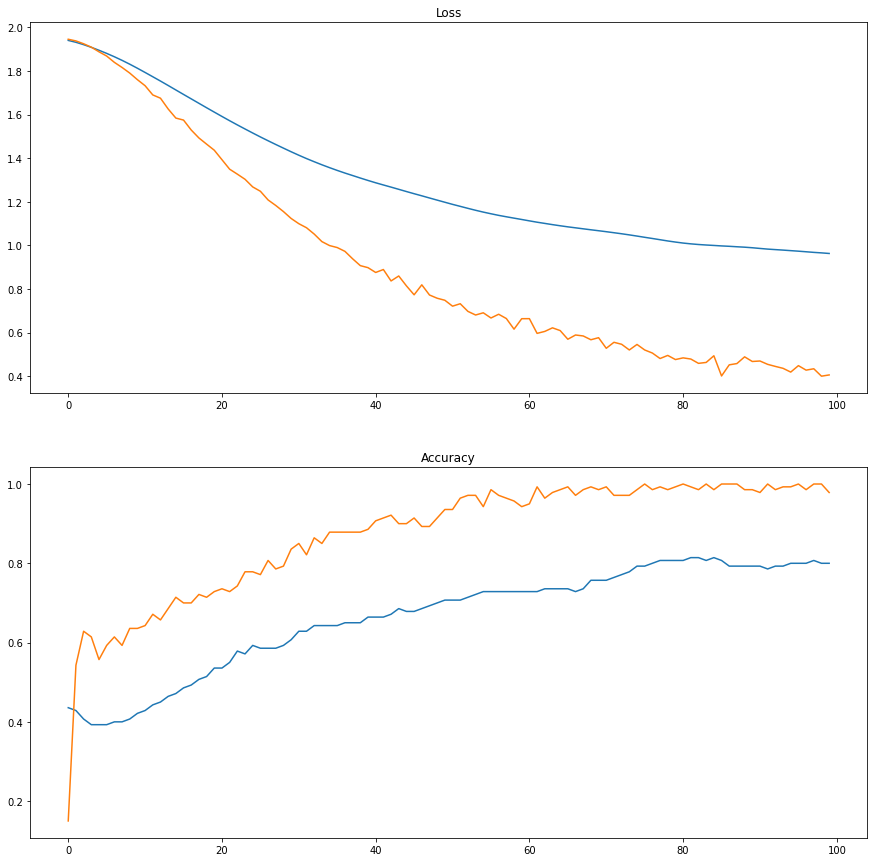

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1, figsize=(15, 15))
axs[0].set_title("Loss")
axs[0].plot(train_loss)
axs[0].plot(val_loss)
axs[1].set_title("Accuracy")
axs[1].plot(train_acc)
axs[1].plot(val_acc)
plt.show()

1.0